In [2773]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2774]:
df = pd.read_csv('train_features.csv', low_memory=False)

In [2775]:
df_test = pd.read_csv('test_features.csv', low_memory=False)

In [2776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [2777]:
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [2778]:
df.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [2779]:
for col in df.columns:
  print(df[col].value_counts())
  print()

tahun_kelahiran
1968    140
1970    137
1969    134
1972    130
1973    125
       ... 
1998      1
1916      1
1912      1
1925      1
1908      1
Name: count, Length: 76, dtype: int64

pendidikan
Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: count, dtype: int64

status_pernikahan
Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: count, dtype: int64

pendapatan
58555000.0     2
98033000.0     2
100016000.0    2
102971000.0    2
147845000.0    2
              ..
75153084.0     1
43279588.0     1
263538206.0    1
112547078.0    1
130512000.0    1
Name: count, Length: 3622, dtype: int64

jumlah_anak_balita
0.0    2594
1.0    1003
2.0      30
Name: count, dtype: int64

jumlah_anak_remaja
0.0    2361
1.0    1226
2.0      26
Name: count, dtype: int64

terakhir_belanja
48.0     57
39.0     55
23.0     53
27.0     52
25.0     50
    

In [2780]:
df.drop(columns=['keluhan'], inplace=True)

In [2781]:
numerical = df.select_dtypes(exclude='object').columns

df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3817 non-null   int64  
 1   pendapatan          3627 non-null   float64
 2   jumlah_anak_balita  3627 non-null   float64
 3   jumlah_anak_remaja  3613 non-null   float64
 4   terakhir_belanja    3645 non-null   float64
 5   belanja_buah        3636 non-null   float64
 6   belanja_daging      3639 non-null   float64
 7   belanja_ikan        3624 non-null   float64
 8   belanja_kue         3603 non-null   float64
 9   pembelian_diskon    3639 non-null   float64
 10  pembelian_web       3652 non-null   float64
 11  pembelian_toko      3648 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 358.0 KB


In [2782]:
df['jumlah_anak_balita'].fillna(0, inplace=True)
df['jumlah_anak_remaja'].fillna(0, inplace=True)
# df['keluhan'].fillna(0, inplace=True)

df_test['jumlah_anak_balita'].fillna(0, inplace=True)
df_test['jumlah_anak_remaja'].fillna(0, inplace=True)
# df_test['keluhan'].fillna(0, inplace=True)

In [2783]:
from sklearn.impute import SimpleImputer

to_fill = [
    'terakhir_belanja',
    'pembelian_diskon',
    'pembelian_web',
    'pembelian_toko'
]

imp = SimpleImputer(strategy = 'median')

for col in to_fill:
  df[col] = imp.fit_transform(df[[col]]).ravel()
  df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2784]:
to_fill = [
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue'
]

imp = SimpleImputer(strategy = 'median')

for col in to_fill:
  df[col] = imp.fit_transform(df[[col]]).ravel()
  df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2785]:
# df['pendapatan'] = np.sqrt(df['pendapatan'])
# df_test['pendapatan'] = np.sqrt(df_test['pendapatan'])

In [2786]:
df['jumlah_anak'] = df['jumlah_anak_balita'] + df['jumlah_anak_remaja']
df_test['jumlah_anak'] = df_test['jumlah_anak_balita'] + df_test['jumlah_anak_remaja']

to_drop = ['jumlah_anak_balita', 'jumlah_anak_remaja']

df.drop(columns=to_drop, inplace=True)
df_test.drop(columns=to_drop, inplace=True)

In [2787]:
df['umur'] = 2014 - df['tahun_kelahiran']
df_test['umur'] = 2014 - df_test['tahun_kelahiran']

# to_drop = ['tahun_kelahiran']

# df.drop(columns=to_drop, inplace=True)

In [2788]:
df['selisih_pendapatan'] = df['pendapatan'] - (df['belanja_buah'] + df['belanja_daging'] + df['belanja_ikan'] + df['belanja_kue'])
df_test['selisih_pendapatan'] = df_test['pendapatan'] - (df_test['belanja_buah'] + df_test['belanja_daging'] + df_test['belanja_ikan'] + df_test['belanja_kue'])

In [2789]:
epsilon = 1e-8

df['avg_outcome'] = (df['belanja_buah'] + df['belanja_daging'] + df['belanja_ikan'] + df['belanja_kue']) / (df['pembelian_web'] + df['pembelian_toko'] + df['pembelian_diskon'] + epsilon)
df_test['avg_outcome'] = (df_test['belanja_buah'] + df_test['belanja_daging'] + df_test['belanja_ikan'] + df_test['belanja_kue']) / (df_test['pembelian_web'] + df_test['pembelian_toko'] + df_test['pembelian_diskon'] + epsilon)

In [2790]:
df['selisih_pembelian'] = (df['pembelian_web'] + df['pembelian_toko']) - df['pembelian_diskon']
df_test['selisih_pembelian'] = (df_test['pembelian_web'] + df_test['pembelian_toko']) - df_test['pembelian_diskon']

In [2791]:
# df['estimasi_total'] = (df['belanja_buah'] + df['belanja_daging'] + df['belanja_ikan'] + df['belanja_kue']) * (df['pembelian_toko'] + df['pembelian_web'])
# df_test['estimasi_total'] = (df_test['belanja_buah'] + df_test['belanja_daging'] + df_test['belanja_ikan'] + df_test['belanja_kue']) * (df_test['pembelian_toko'] + df_test['pembelian_web'])

# to_drop = ['pembelian_diskon', 'pembelian_web', 'pembelian_toko']

# df.drop(columns = to_drop, inplace = True)
# df_test.drop(columns = to_drop, inplace = True)

In [2792]:
# df['pembelian_normal'] = df['pembelian_web'] + df['pembelian_toko']
# df_test['pembelian_normal'] = df_test['pembelian_web'] + df_test['pembelian_toko']

# to_drop = ['pembelian_web', 'pembelian_toko']

# df.drop(columns = to_drop, inplace = True)
# df_test.drop(columns=to_drop, inplace=True)

In [2793]:
# def categorize(value):
#     if value <= 7:
#         return "Langganan"
#     elif 8 <= value <= 60:
#         return "Sering"
#     else:
#         return "Jarang"

# def categorize(value):
#     if value <= 30:
#         return 2
#     elif 31 <= value <= 60:
#         return 1
#     else:
#         return 0

# df['freq'] = df['terakhir_belanja'].apply(categorize)
# df_test['freq'] = df_test['terakhir_belanja'].apply(categorize)

# to_drop = ['terakhir_belanja']

# df.drop(columns = to_drop, inplace = True)
# df_test.drop(columns=to_drop, inplace=True)

In [2794]:
df['avg_spending'] = df[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].mean(axis=1)
df_test['avg_spending'] = df_test[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].mean(axis=1)

In [2795]:
# epsilon = 1e-8

# df['discount_ratio'] = df['pembelian_diskon'] / (df['belanja_buah'] + df['belanja_daging'] + df['belanja_ikan'] + df['belanja_kue'] + epsilon)
# df_test['discount_ratio'] = df_test['pembelian_diskon'] / (df_test['belanja_buah'] + df_test['belanja_daging'] + df_test['belanja_ikan'] + df_test['belanja_kue'] + epsilon)

In [2796]:
# df['shopping_expense_percentage'] = ((df['belanja_buah'] + df['belanja_daging'] + df['belanja_ikan'] + df['belanja_kue']) / df['pendapatan']) * 100
# df_test['shopping_expense_percentage'] = ((df_test['belanja_buah'] + df_test['belanja_daging'] + df_test['belanja_ikan'] + df_test['belanja_kue']) / df_test['pendapatan']) * 100

In [2797]:
# epsilon = 1e-8

# df['shopping_freq'] = (df['pembelian_web'] + df['pembelian_toko'] + df['pembelian_diskon']) / (df['terakhir_belanja'] + epsilon)
# df_test['shopping_freq'] = (df_test['pembelian_web'] + df_test['pembelian_toko'] + df_test['pembelian_diskon']) / (df_test['terakhir_belanja'] + epsilon)

In [2798]:
# df['umur_pendapatan'] = df['umur'] * df['pendapatan']
# df_test['umur_pendapatan'] = df_test['umur'] * df_test['pendapatan']

In [2799]:
# df['umur'] = np.sqrt(df['umur'])
# df_test['umur'] = np.sqrt(df_test['umur'])

In [2800]:
# df['pembelian_diskon'] = np.sqrt(df['pembelian_diskon'])
# df_test['pembelian_diskon'] = np.sqrt(df_test['pembelian_diskon'])

In [2801]:
# df['pembelian_toko'] = np.sqrt(df['pembelian_toko'])
# df_test['pembelian_toko'] = np.sqrt(df_test['pembelian_toko'])

In [2802]:
# df['pembelian_web'] = np.sqrt(df['pembelian_web'])
# df_test['pembelian_web'] = np.sqrt(df_test['pembelian_web'])

In [2803]:
# df['hari_terakhir_belanja'] = pd.to_datetime(df['terakhir_belanja']).dt.day
# df['minggu_terakhir_belanja'] = df['terakhir_belanja'] / 7

# df_test['hari_terakhir_belanja'] = pd.to_datetime(df_test['terakhir_belanja']).dt.day
# df_test['minggu_terakhir_belanja'] = df['terakhir_belanja'] / 7

# to_drop = ['terakhir_belanja']

# df.drop(columns = to_drop, inplace = True)
# df_test.drop(columns=to_drop, inplace=True)

In [2804]:
categorical = df.select_dtypes(include='object').columns

df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pendidikan               3628 non-null   object
 1   status_pernikahan        3605 non-null   object
 2   tanggal_menjadi_anggota  1065 non-null   object
dtypes: object(3)
memory usage: 89.6+ KB


In [2805]:
to_fill = [
    # 'status_pernikahan',
    # 'pendidikan'
]

imp = SimpleImputer(strategy = 'most_frequent')

for col in to_fill:
  df[col] = imp.fit_transform(df[[col]]).ravel()
  df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2806]:
# imp = SimpleImputer(strategy = 'most_frequent')

# for col in categorical:
#   df[col] = imp.fit_transform(df[[col]]).ravel()
#   df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2807]:
# df['status_pernikahan'].fillna(df.apply(lambda row: 'menikah' if row['jumlah_anak'] > 0 else 'sendiri', axis=1), inplace=True)

In [2808]:
df['pendidikan'].replace('5', df['pendidikan'].mode()[0], inplace = True)
df['status_pernikahan'].replace('5', df['status_pernikahan'].mode()[0], inplace = True)

df_test['pendidikan'].replace('5', df_test['pendidikan'].mode()[0], inplace = True)
df_test['status_pernikahan'].replace('5', df_test['status_pernikahan'].mode()[0], inplace = True)

In [2809]:
target_dict = {
    'Sarjana': 3,
    'Doktor': 5,
    'SMA': 2,
    'Magister': 4,
    'SMP': 1
}

target_dict[np.nan] = 0

# target_dict = {
#     'Sarjana': 'Sarjana',
#     'Doktor': 'Doktor',
#     'SMA': 'Sekolah',
#     'Magister': 'Magister',
#     'SMP': 'Sekolah'
# }

df['pendidikan'] = df['pendidikan'].map(target_dict)
df_test['pendidikan'] = df_test['pendidikan'].map(target_dict)

In [2810]:
# target_dict = {
#     'Sarjana': 1,
#     'Doktor': 1,
#     'SMA': 0,
#     'Magister': 1,
#     'SMP': 0
# }

# df['college'] = df['pendidikan'].map(target_dict)
# df_test['college'] = df_test['pendidikan'].map(target_dict)

# df.drop(columns = 'pendidikan', inplace = True)
# df_test.drop(columns = 'pendidikan', inplace = True)

In [2811]:
# to_drop = ['tahun_kelahiran']

# df.drop(columns = to_drop, inplace = True)
# df_test.drop(columns=to_drop, inplace=True)

In [2812]:
target_dict = {
    'Rencana Menikah': 1,
    'Menikah': 2,
    'Sendiri': 0,
    'Cerai': 3,
    'Cerai Mati': 4
}

target_dict[np.nan] = 5

df['status_pernikahan'] = df['status_pernikahan'].map(target_dict)
df_test['status_pernikahan'] = df_test['status_pernikahan'].map(target_dict)

In [2813]:
# to_ohe = [
#     'status_pernikahan',
#     'freq'
# ]

# onehot = pd.get_dummies(df[to_ohe])

# onehot = onehot.astype(int)
# onehot.sample(5)

In [2814]:
# onehot_test = pd.get_dummies(df_test[to_ohe])

# onehot_test = onehot_test.astype(int)
# onehot_test.sample(5)

In [2815]:
# df['member'] = df['tanggal_menjadi_anggota'].notna().astype(int)
# df_test['member'] = df_test['tanggal_menjadi_anggota'].notna().astype(int)

# to_drop = ['tanggal_menjadi_anggota']

# df.drop(columns=to_drop, inplace=True)
# df_test.drop(columns=to_drop, inplace=True)

In [2816]:
epsilon = 1e-8

divider = df['jumlah_anak'] + df.apply(lambda row: 1 if row['jumlah_anak'] == 'menikah' else 0, axis=1) + epsilon
df['pengeluaran_primer'] = df['selisih_pendapatan'] / divider

divider = df_test['jumlah_anak'] + df_test.apply(lambda row: 1 if row['jumlah_anak'] == 'menikah' else 0, axis=1) + epsilon
df_test['pengeluaran_primer'] = df_test['selisih_pendapatan'] / divider

to_drop = ['jumlah_anak']

df.drop(columns = to_drop, inplace = True)

In [2817]:
# df.drop(columns='pendidikan', inplace=True)
# df_test.drop(columns='pendidikan', inplace=True)

In [2818]:
numerical = df.select_dtypes(exclude='object').columns

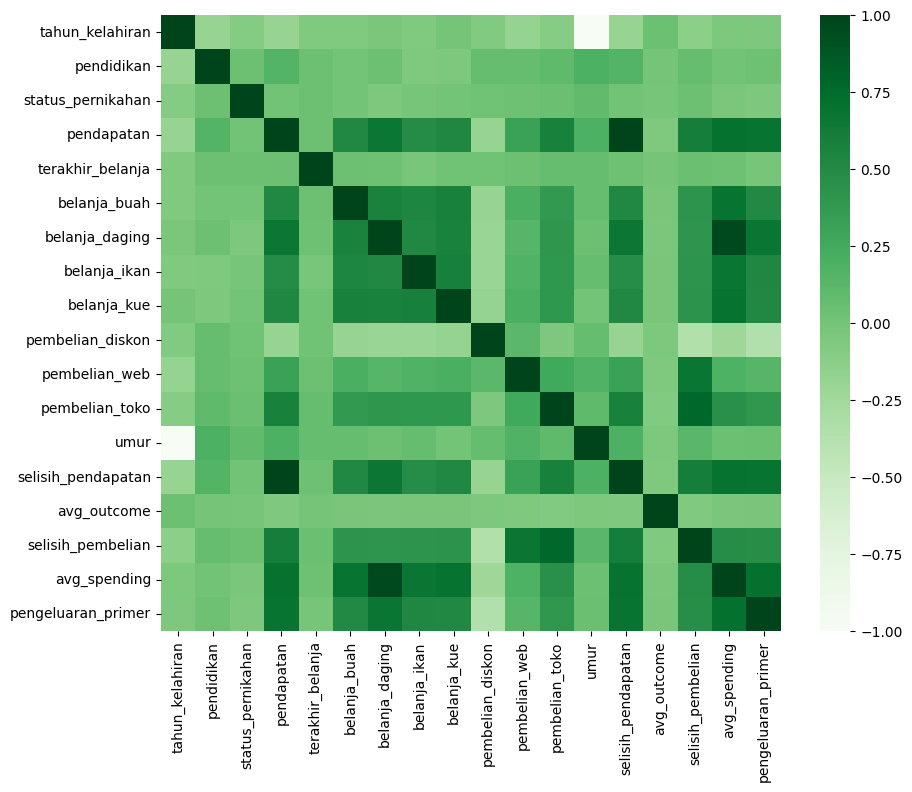

In [2819]:
import seaborn as sns

numeric = df.select_dtypes(exclude='object')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric.corr(), cmap='Greens')
plt.show()

In [2820]:
# import seaborn as sns

# fig = plt.figure(figsize=(24,25))

# for i in range(numerical.size):
#   fig.add_subplot(5, 5, i+1)
#   sns.scatterplot(df[numerical[i]], color="cyan")

In [2821]:
# not_removed = [
#     'tahun_kelahiran',
#     'pendidikan',
#     'pembelian_diskon',
#     'pembelian_web',
#     'pembelian_toko',
#     'umur'
# ]

# remove = [numerical for numerical in numerical if numerical not in not_removed]

In [2822]:
# for col in remove:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[col] = df[col].where((df[col] >= lower_bound) & (df[col] <= upper_bound))

In [2823]:
# fig = plt.figure(figsize=(24,25))

# for i in range(numerical.size):
#   fig.add_subplot(5, 5, i+1)
#   sns.scatterplot(df[numerical[i]], color="cyan")

In [2824]:
# df.isnull().sum()

In [2825]:
# to_fill = [
#     'selisih_pembelian'
# ]

# imp = SimpleImputer(strategy = 'median')

# for col in to_fill:
#   df[col] = imp.fit_transform(df[[col]]).ravel()
#   df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2826]:
# to_fill = [
#     'pendapatan',
#     'selisih_pendapatan',
#     'belanja_buah',
#     'belanja_daging',
#     'belanja_ikan',
#     'belanja_kue',
#     'avg_spending'
# ]

# imp = SimpleImputer(strategy = 'median')

# for col in to_fill:
#   df[col] = imp.fit_transform(df[[col]]).ravel()
#   df_test[col] = imp.fit_transform(df_test[[col]]).ravel()

In [2827]:
# df.isnull().sum()

In [2828]:
target_labels = pd.read_csv('train_labels.csv', low_memory = False)

target_labels.value_counts()

jumlah_promosi
0                 983
5                 557
1                 515
4                 515
3                 472
2                 389
6                 386
Name: count, dtype: int64

In [2829]:
data = pd.concat([df[numerical], target_labels], axis = 1)
data_test = pd.concat([df_test[numerical]], axis = 1)

data.sample(5)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,umur,selisih_pendapatan,avg_outcome,selisih_pembelian,avg_spending,pengeluaran_primer,jumlah_promosi
3053,1965,3,0,140519065.0,12.0,18087.0,88604.0,32686.0,22901.0,0.0,8.0,4.0,49,140356787.0,13523.166655,12.0,40569.500,1.403568e+16,4
987,1961,4,2,66081847.0,91.0,20978.0,58327.0,17680.0,5694.0,0.0,2.0,4.0,53,65979168.0,17113.166638,6.0,25669.750,6.597917e+07,0
830,1980,4,2,95124000.0,81.0,0.0,24276.0,4046.0,6069.0,2.0,3.0,4.0,34,95089609.0,3821.222218,5.0,8597.750,9.508961e+07,0
2918,1954,5,0,93293176.0,27.0,30866.0,46057.0,36054.5,19113.0,2.0,4.0,3.0,60,93161085.5,14676.722206,5.0,33022.625,9.316109e+15,5
719,1968,4,0,77000492.0,47.0,14550.0,177368.0,43940.0,23874.0,4.0,4.0,5.0,46,76740760.0,19979.384600,5.0,64933.000,7.674076e+07,5


In [2830]:
# data = pd.concat([df[numerical], onehot, target_labels], axis = 1)
# data_test = pd.concat([df_test[numerical], onehot_test], axis = 1)

# data.sample(5)

In [2831]:
for col in data.columns:
  print(col)
  print(data[col].unique())
  print()

tahun_kelahiran
[1979 1950 1966 1961 1970 1952 1963 1959 1957 1975 1953 1968 1983 1977
 1973 1969 1980 1965 1960 1982 1971 1972 1958 1944 1986 1962 1967 1984
 1976 1964 1954 1956 1978 1991 1981 1946 1974 1947 1955 1989 1945 1948
 1990 1951 1988 1949 1985 1943 1996 1987 1909 1993 1992 1925 1912 1999
 1941 1995 1994 1916 1942 1998 1899 1902 1922 2000 1918 1920 1997 1929
 1940 1932 1924 1900 1914 1908]

pendidikan
[3 4 2 1 5 0]

status_pernikahan
[1 2 0 3 5 4]

pendapatan
[1.15621394e+08 8.40630000e+07 1.27532564e+08 ... 1.04621000e+08
 1.10850000e+08 1.30512000e+08]

terakhir_belanja
[ 47.  70.  45.  90.  78.   9.  96.  21.  26.  67.  59.  57.   5.  65.
  61.  25.  16.   0.  50.  69.  84.  56.  54.  17.  51.  29.  73.  60.
  87.  62.  41.  35.   3.  36.  58.  64.  55.  12.  19.  30.  28.  11.
 114.   4.  76.  85.  15.  80.  81.  37.  18.  20.   6.  77.  22.  32.
  75.  43.  31.  23.  44.  66.  68.  79.  99.  39.  46.  33.  27.   8.
  14. 100.  91.  49.  92.  52.   7.  48.  82.  72.  89. 

In [2832]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [2833]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=17)
X, y = smote.fit_resample(X, y)

X.shape, y.shape

((6881, 18), (6881,))

In [2834]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5160, 18), (1721, 18), (5160,), (1721,))

In [2835]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
# X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [2836]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()

# X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
# X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [2837]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [2838]:
from sklearn.metrics import classification_report

In [2839]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# y_pred = lr.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2840]:
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier()
# y_pred = dt.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2841]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y_pred = rf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       240
           1       0.75      0.72      0.73       255
           2       0.89      0.90      0.90       257
           3       0.96      0.93      0.94       262
           4       0.90      0.95      0.92       234
           5       0.92      0.92      0.92       256
           6       0.86      0.94      0.90       217

    accuracy                           0.85      1721
   macro avg       0.85      0.85      0.85      1721
weighted avg       0.85      0.85      0.85      1721



In [2842]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbm = GradientBoostingClassifier()
# y_pred = gbm.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2843]:
# from sklearn.svm import SVC

# svm = SVC()
# y_pred = svm.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2844]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()
# y_pred = knn.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2845]:
# from sklearn.naive_bayes import GaussianNB

# nb = GaussianNB()
# y_pred = nb.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2846]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
y_pred = xgb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       240
           1       0.73      0.67      0.70       255
           2       0.89      0.90      0.89       257
           3       0.93      0.92      0.92       262
           4       0.93      0.95      0.94       234
           5       0.91      0.90      0.90       256
           6       0.88      0.93      0.90       217

    accuracy                           0.85      1721
   macro avg       0.85      0.85      0.85      1721
weighted avg       0.85      0.85      0.85      1721



In [2847]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
y_pred = lgb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 5160, number of used features: 18
[LightGBM] [Info] Start training from score -1.937996
[LightGBM] [Info] Start training from score -1.958391
[LightGBM] [Info] Start training from score -1.961142
[LightGBM] [Info] Start training from score -1.968053
[LightGBM] [Info] Start training from score -1.929953
[LightGBM] [Info] Start training from score -1.959765
[LightGBM] [Info] Start training from score -1.907510
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       240
           1       0.68      0.68      0.68       255
           2       0.89      0.87      0.88       257
           3       0.95      0.94      0.94       262
           4       0.94      0.95      0.94       234
         

In [2848]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier()
# y_pred = mlp.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2849]:
# from sklearn.gaussian_process import GaussianProcessClassifier

# gp = GaussianProcessClassifier()
# y_pred = gp.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2850]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# qda = QuadraticDiscriminantAnalysis()
# y_pred = qda.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2851]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis()
# y_pred = lda.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2852]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
y_pred = et.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69       240
           1       0.76      0.75      0.76       255
           2       0.90      0.92      0.91       257
           3       0.97      0.94      0.96       262
           4       0.89      0.96      0.92       234
           5       0.94      0.93      0.94       256
           6       0.90      0.95      0.93       217

    accuracy                           0.87      1721
   macro avg       0.87      0.87      0.87      1721
weighted avg       0.87      0.87      0.87      1721



In [2853]:
# from sklearn.linear_model import RidgeClassifier

# rc = RidgeClassifier()
# y_pred = rc.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred))

In [2854]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=17)

In [2855]:
# import optuna
from sklearn.model_selection import cross_val_score

In [2856]:
# def rf_obj(trial):
#   params = {
#     'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#     'max_depth': trial.suggest_int('max_depth', 5, 30, step=5),
#     'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#     'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#     'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#     'random_state': 7
#   }

#   model = RandomForestClassifier(**params)

#   cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

#   score = cv_scores.mean()

#   return score

# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(rf_obj, n_trials=100)

# best_params_rf = study_rf.best_params

In [2857]:
# def xgb_obj(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
#         'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
#         'subsample': trial.suggest_float('subsample', 0.6, 0.95),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.95),
#         'random_state': 7
#     }

#     model = XGBClassifier(**params)

#     cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

#     score = cv_scores.mean()

#     return score

# study_xgb = optuna.create_study(direction='maximize')
# study_xgb.optimize(xgb_obj, n_trials=100)

# best_params_xgb = study_xgb.best_params

In [2858]:
# def et_obj(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#         'random_state': 7
#     }

#     model = ExtraTreesClassifier(**params)

#     cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

#     score = cv_scores.mean()

#     return score

# study_et = optuna.create_study(direction='maximize')
# study_et.optimize(et_obj, n_trials=100)

# best_params_et = study_et.best_params

In [2859]:
# def lgb_obj(trial):
#     params = {
#         'objective': 'multiclass',
#         'num_class': 3,
#         'metric': 'multi_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
#         'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#     }

#     model = LGBMClassifier(**params)

#     cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

#     score = cv_scores.mean()

#     return score

# study_lgb = optuna.create_study(direction='maximize')
# study_lgb.optimize(lgb_obj, n_trials=100)

# best_params_lgb = study_lgb.best_params

In [2860]:
# print(best_params_rf)
best_params_rf = {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}

In [2861]:
# print(best_params_xgb)
best_params_xgb = {'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.045546861561628585, 'gamma': 0.011966862317707952, 'subsample': 0.735621933091, 'colsample_bytree': 0.6202579139088383}

In [2862]:
# print(best_params_et)
best_params_et = {'n_estimators': 400, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

In [2863]:
# print(best_params_lgb)
best_params_lgb = {'lambda_l1': 2.5834298469946155e-06, 'lambda_l2': 4.774607257760168e-05, 'num_leaves': 241, 'feature_fraction': 0.47069234117088393, 'bagging_fraction': 0.7781025626923572, 'bagging_freq': 6, 'min_child_samples': 7}
# best_params_lgb = {'lambda_l1': 0.00023554842555996192, 'lambda_l2': 1.6852943424092103e-06, 'num_leaves': 213, 'feature_fraction': 0.49791308690181946, 'bagging_fraction': 0.9025669702686023, 'bagging_freq': 4, 'min_child_samples': 5}

In [2864]:
rf_tuned = RandomForestClassifier(**best_params_rf)
y_pred = rf_tuned.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       240
           1       0.75      0.71      0.73       255
           2       0.89      0.90      0.90       257
           3       0.95      0.94      0.94       262
           4       0.88      0.95      0.91       234
           5       0.93      0.93      0.93       256
           6       0.88      0.94      0.91       217

    accuracy                           0.85      1721
   macro avg       0.85      0.85      0.85      1721
weighted avg       0.85      0.85      0.85      1721



In [2865]:
et_tuned = ExtraTreesClassifier()
y_pred = et_tuned.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       240
           1       0.80      0.78      0.79       255
           2       0.90      0.91      0.90       257
           3       0.96      0.95      0.96       262
           4       0.94      0.96      0.95       234
           5       0.93      0.92      0.93       256
           6       0.90      0.95      0.93       217

    accuracy                           0.88      1721
   macro avg       0.88      0.88      0.88      1721
weighted avg       0.88      0.88      0.88      1721



In [2866]:
xgb_tuned = XGBClassifier(**best_params_xgb)
y_pred = xgb_tuned.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       240
           1       0.69      0.68      0.69       255
           2       0.90      0.91      0.90       257
           3       0.95      0.93      0.94       262
           4       0.91      0.95      0.93       234
           5       0.93      0.91      0.92       256
           6       0.92      0.94      0.93       217

    accuracy                           0.85      1721
   macro avg       0.85      0.85      0.85      1721
weighted avg       0.85      0.85      0.85      1721



In [2867]:
lgb_tuned = LGBMClassifier(**best_params_lgb)
y_pred = lgb_tuned.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [Warning] lambda_l1 is set=2.5834298469946155e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5834298469946155e-06
[LightGBM] [Warning] bagging_fraction is set=0.7781025626923572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7781025626923572
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [

In [2868]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_rf = AdaBoostClassifier(rf_tuned, n_estimators = 50, random_state = 17)

y_pred = adaboost_rf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       240
           1       0.76      0.73      0.74       255
           2       0.91      0.90      0.90       257
           3       0.95      0.94      0.94       262
           4       0.88      0.95      0.92       234
           5       0.92      0.92      0.92       256
           6       0.90      0.95      0.92       217

    accuracy                           0.86      1721
   macro avg       0.85      0.86      0.86      1721
weighted avg       0.86      0.86      0.86      1721



In [2869]:
adaboost_et = AdaBoostClassifier(et_tuned, n_estimators = 50, random_state = 17)

y_pred = adaboost_et.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       240
           1       0.79      0.76      0.78       255
           2       0.92      0.93      0.92       257
           3       0.96      0.95      0.96       262
           4       0.90      0.95      0.93       234
           5       0.94      0.94      0.94       256
           6       0.90      0.94      0.92       217

    accuracy                           0.88      1721
   macro avg       0.87      0.88      0.88      1721
weighted avg       0.88      0.88      0.88      1721



In [2879]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('rf', adaboost_et), ('et', et), ('lgb', lgb_tuned)], voting='hard')

y_pred = voting.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [Warning] lambda_l1 is set=2.5834298469946155e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5834298469946155e-06
[LightGBM] [Warning] bagging_fraction is set=0.7781025626923572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7781025626923572
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [

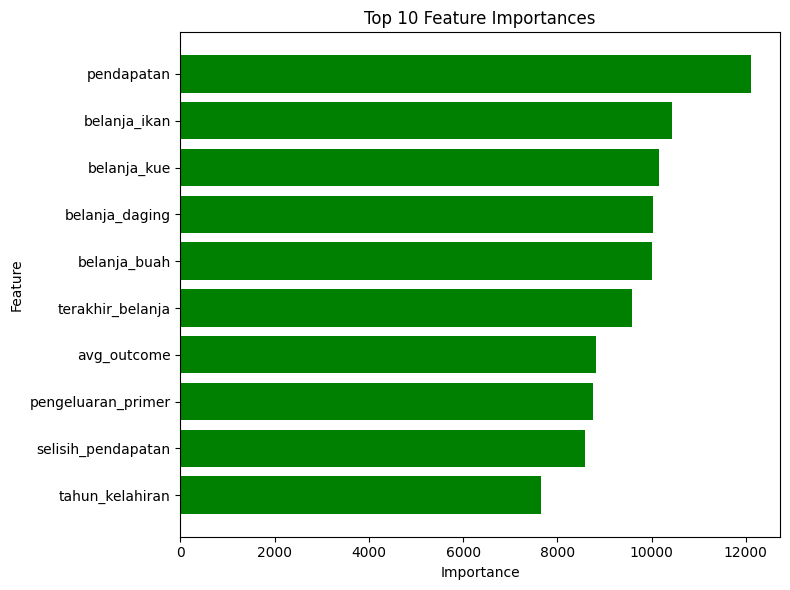

In [2871]:
importances = lgb_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

feature = X_train.columns

top_indices = indices[:10]

plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[top_indices][::-1], align="center", color = 'g')
plt.yticks(range(10), feature[top_indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

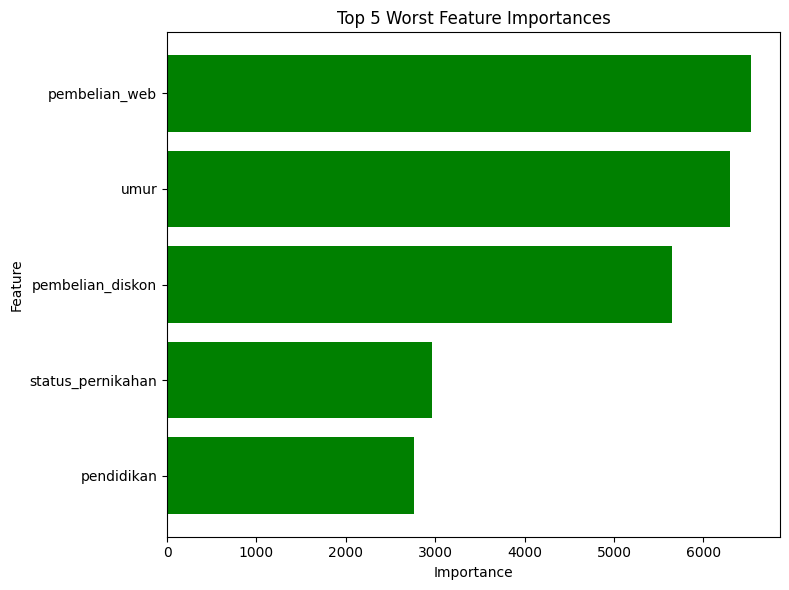

In [2872]:
worst_indices = indices[-5::]

plt.figure(figsize=(8, 6))
plt.title("Top 5 Worst Feature Importances")
plt.barh(range(5), importances[worst_indices][::-1], align="center", color = 'g')
plt.yticks(range(5), feature[worst_indices][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [2880]:
pred = voting.fit(X, y).predict(data_test)

[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [Warning] lambda_l1 is set=2.5834298469946155e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5834298469946155e-06
[LightGBM] [Warning] bagging_fraction is set=0.7781025626923572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7781025626923572
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.47069234117088393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47069234117088393
[LightGBM] [Warning] lambda_l2 is set=4.774607257760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.774607257760168e-05
[LightGBM] [

In [2881]:
result = pd.DataFrame({'ID': df_test.iloc[:, 0].values, 'jumlah_promosi': pred})

result.head(5)
result.to_csv('submission.csv', index=False)